In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import os


plt.style.use(['science', 'ieee', 'no-latex'])

In [2]:
os.chdir("/home/saumya/Documents/Spec_data/FINAL_DATA_FINAL1/Model_data_noisy/ICM")

In [3]:
pred = np.load('pred_vals_icm.npy')

In [4]:
pred

array([[378.59503978,   7.19680808,  38.81835415],
       [543.22201094,   6.36601895,  49.95236795],
       [310.45914261,   5.27493635,  22.21936889],
       ...,
       [394.20095039,   6.91544372,  42.7104025 ],
       [358.4053989 ,   6.0935203 ,  21.99558669],
       [655.2451583 ,   4.09856695,  32.98117522]])

In [5]:
true = np.load('true_vals_icm.npy')

In [6]:
def bolts(A2, A3, x, x_o):
    A1 = 303
    a = []
    for i in range(len(A2)):
        b = A1 + (A2[i] - A1)/(1+np.exp((x-x_o[i])/A3[i]))
        a.append(b)
    return(np.array(a))

In [7]:
x = np.linspace(0, 55, 1000)

In [8]:
Pred_pro = bolts(pred[:, 0], pred[:, 1], x, pred[:, 2])

In [9]:
True_pro = bolts(true[:, 0], true[:, 1], x, pred[:, 2])

In [10]:
true[:, 0]

array([377.21052632, 525.63157895, 303.        , ..., 377.21052632,
       327.73684211, 624.57894737])

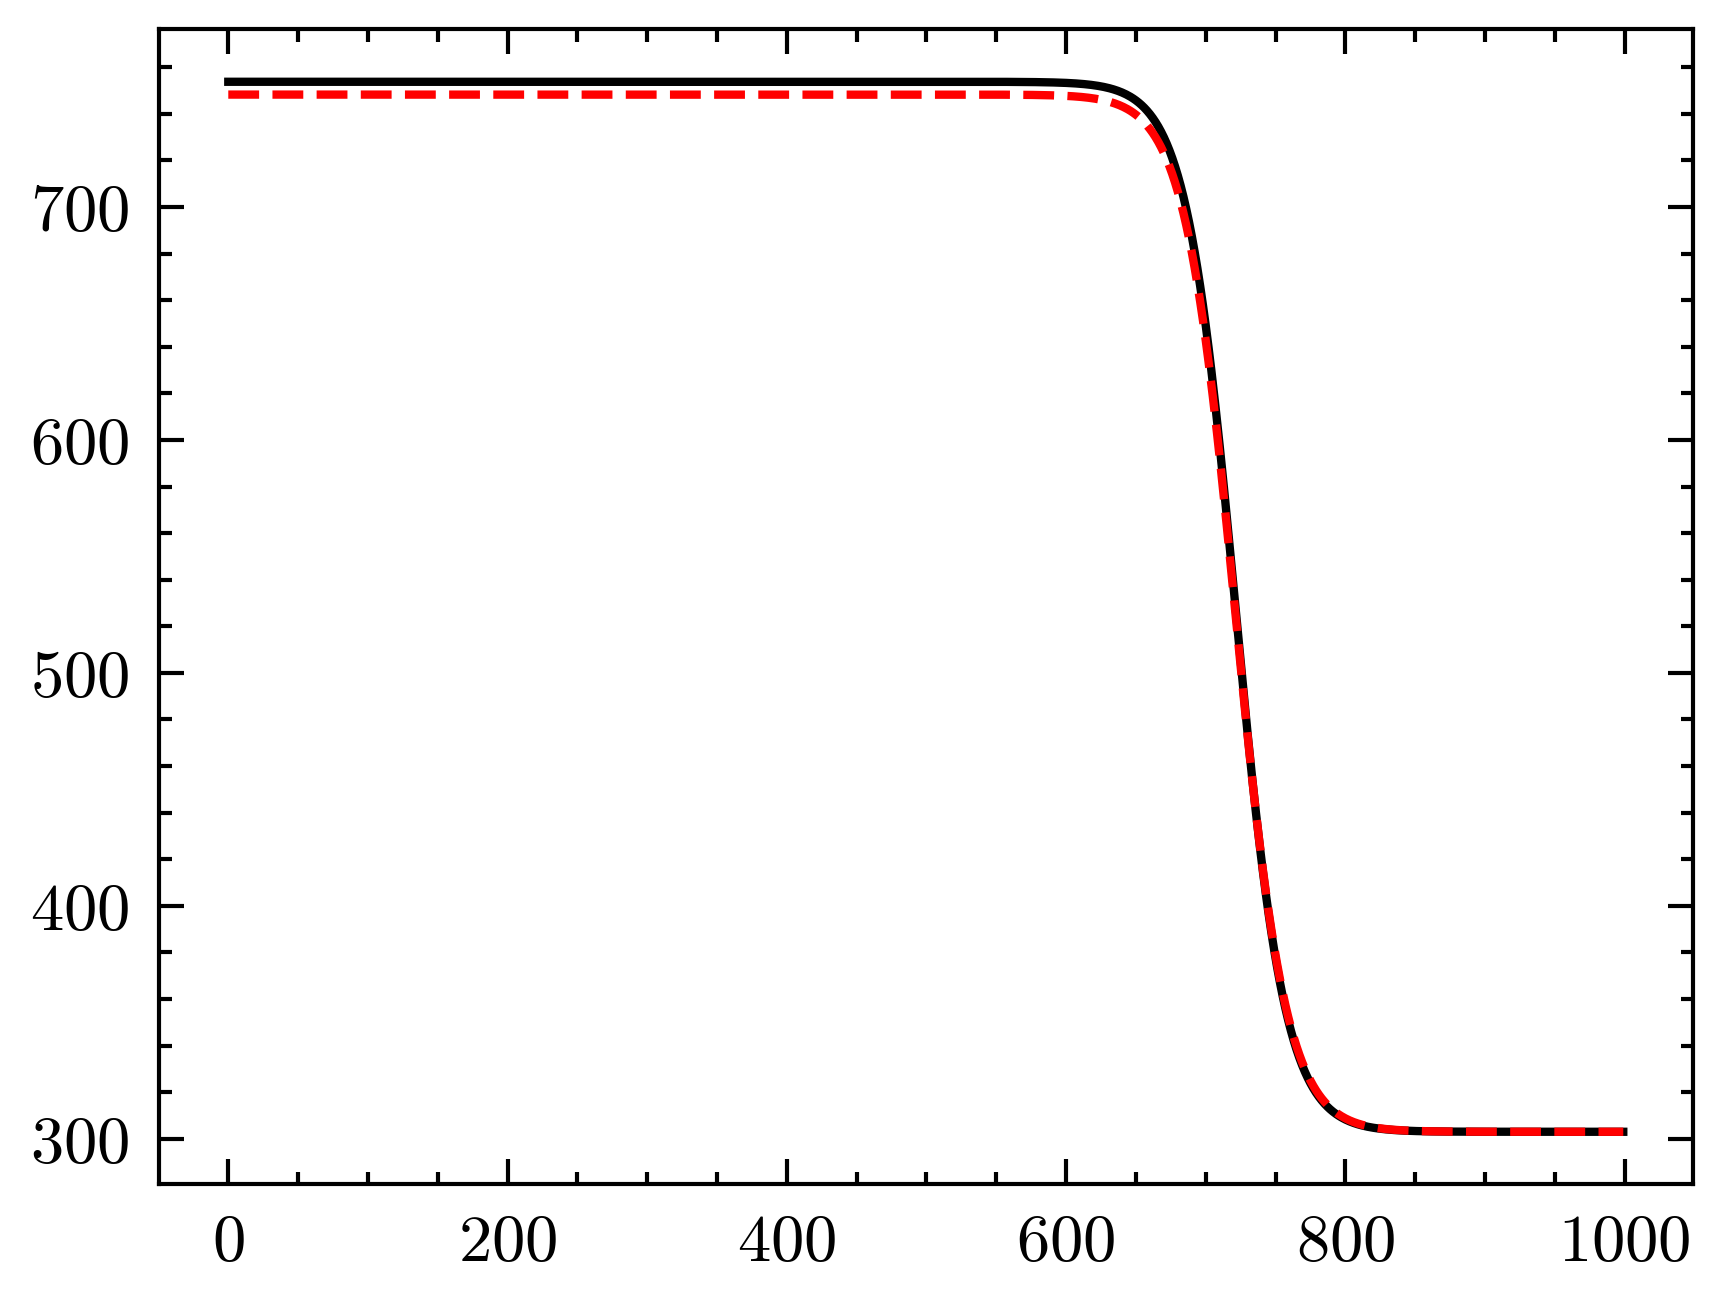

In [11]:
plt.plot(Pred_pro[10])
plt.plot(True_pro[10])

In [12]:
error_def = True_pro-Pred_pro

In [13]:
rms = []
for i in error_def:
    rms.append(np.sqrt(np.mean(i**2)))
rms = np.array(rms)

In [14]:
rms.shape

(1400,)

In [15]:
max(rms)

82.89125557857207

In [16]:
min(rms)

7.923288456948467e-05

In [17]:
np.sqrt(np.mean(rms**2))

20.24501380475983

In [18]:
#checking models now
import pickle

In [19]:
with open('gpr_ICM_Norm.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [20]:
test_exp = np.load('/home/saumya/Documents/Flame_dianostics-temperature_profile_estimation_using_ML/FINAL_VISUAL/test_hpu.npy')

In [21]:
test_exp_0 = np.load('/home/saumya/Documents/Flame_dianostics-temperature_profile_estimation_using_ML/FINAL_VISUAL/Exp_test.npy')

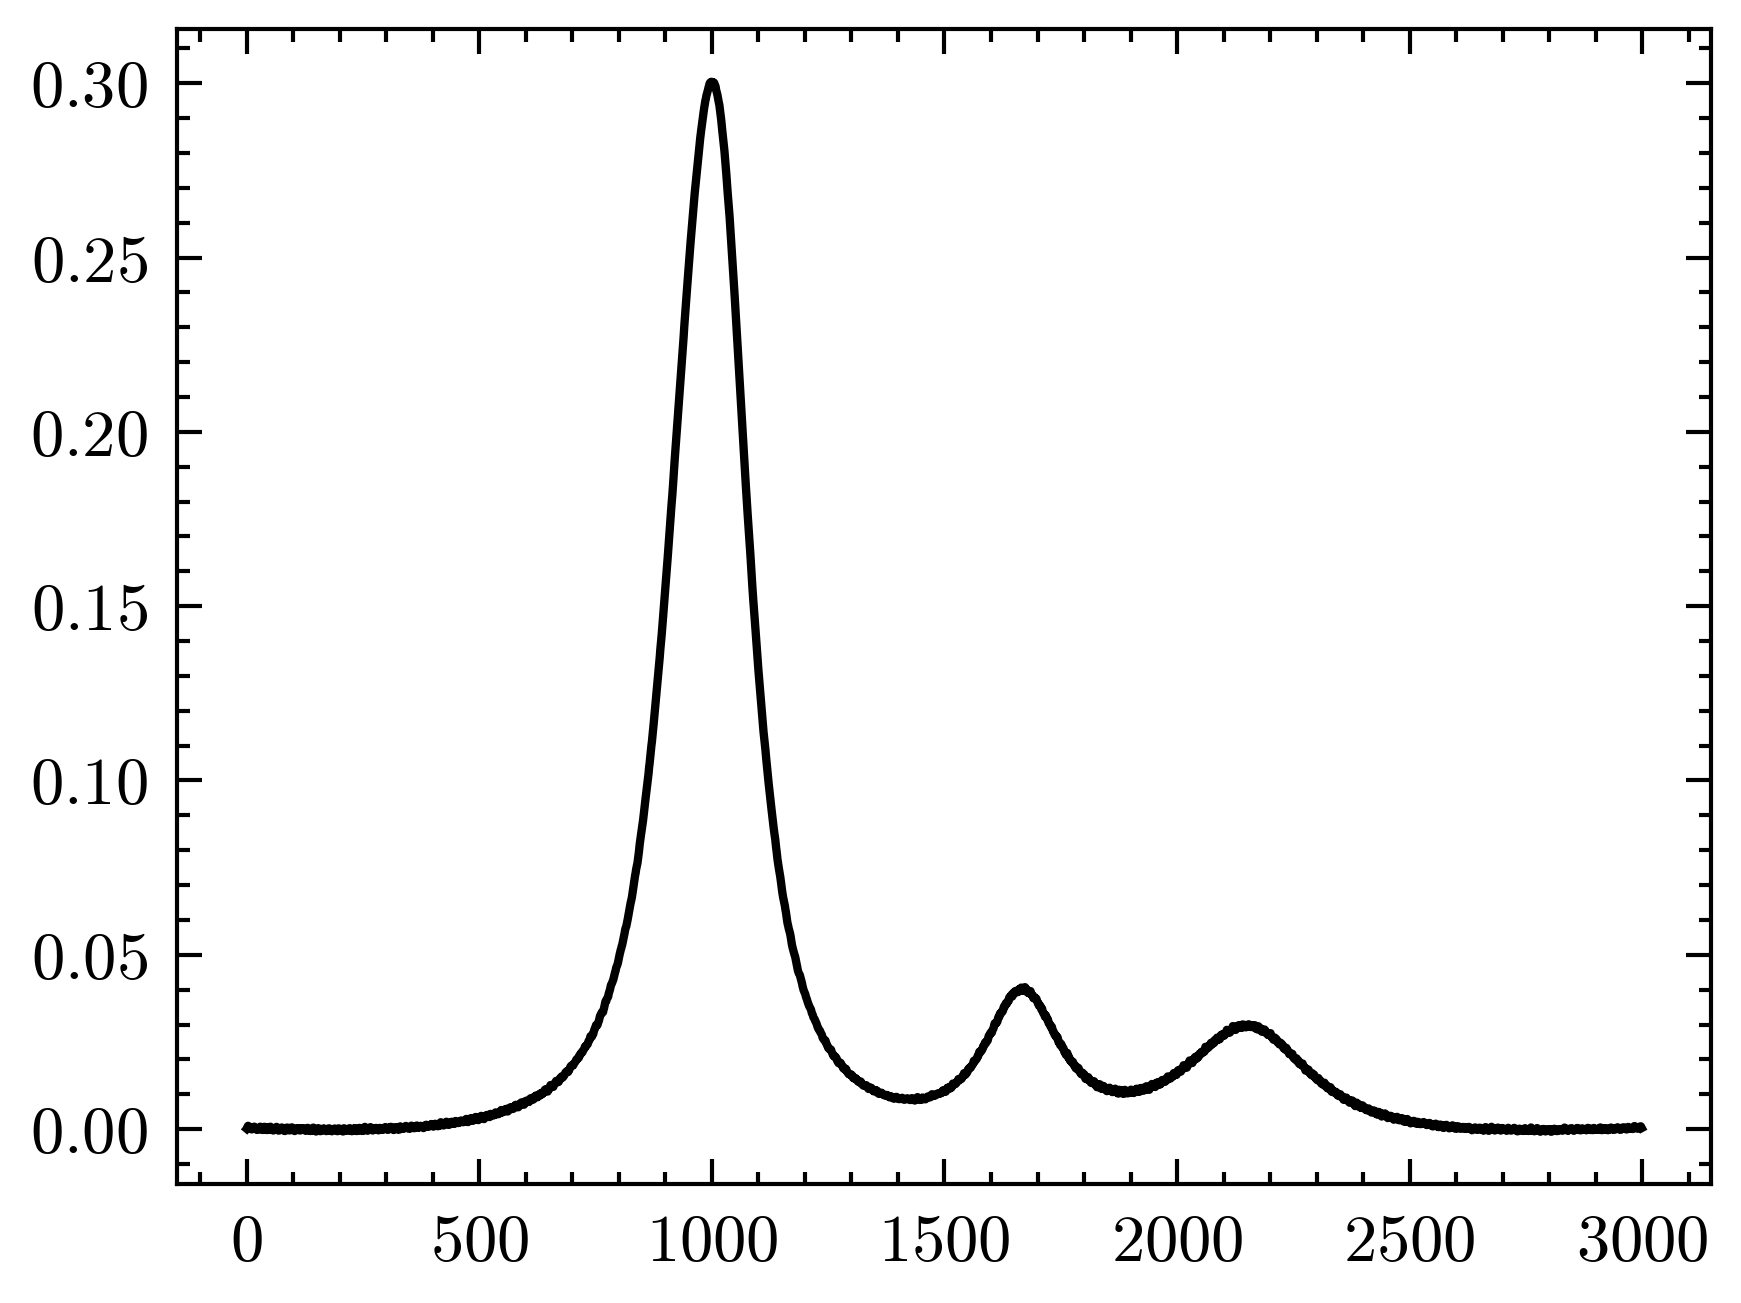

In [22]:
plt.plot(test_exp_0)

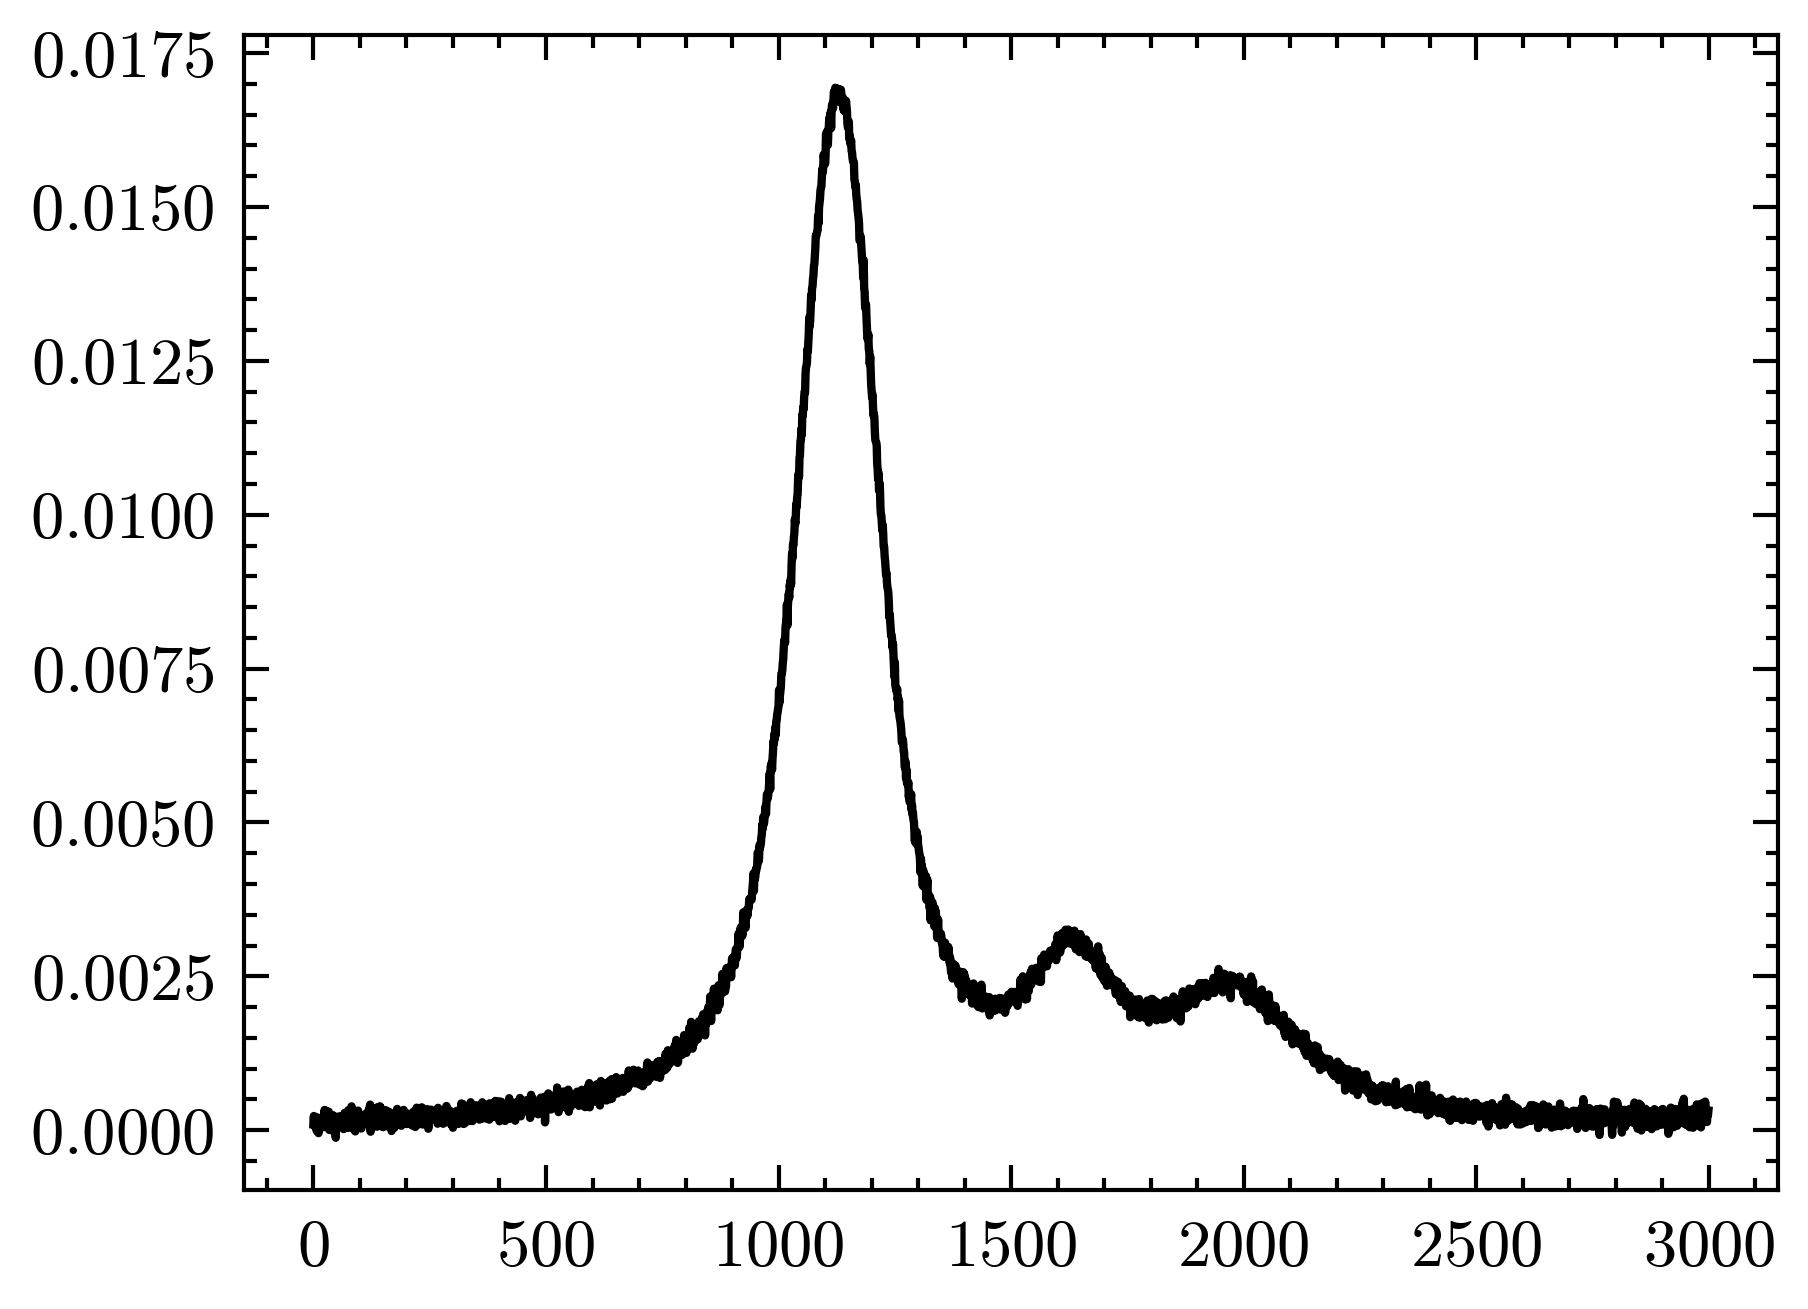

In [23]:
plt.plot(test_exp[0])

In [24]:
test_exp[0] = test_exp_0/2

In [25]:
# test_exp = test_exp/100

In [26]:
newX = test_exp

newX = np.concatenate((newX,np.zeros((np.shape(test_exp)[0],1))),1)
noise_dict = {'output_index':newX[:,-1].astype(int)}
ys_norm,var=loaded_model.predict(newX,Y_metadata=noise_dict)

In [27]:
ys_norm

array([[ 1.59365163e-06,  4.23864852e-06,  1.39067152e-06],
       [ 4.01430279e+00, -6.02334610e+00, -5.41503243e+00],
       [ 5.45362902e+00, -7.12815467e+00, -6.79708337e+00],
       ...,
       [ 1.55788015e+00, -3.92311998e+00, -2.40355442e+00],
       [ 5.31743349e+00, -6.24896479e+00, -2.80925274e+00],
       [ 2.39484427e+00, -4.50288319e+00, -3.67315588e+00]])

In [28]:
with open('ICM_A1.pkl', 'rb') as file:
    y_A1_T = pickle.load(file)


with open('ICM_A2.pkl', 'rb') as file:
    y_A2_T = pickle.load(file)

with open('ICM_A3.pkl', 'rb') as file:
    y_A3_T = pickle.load(file)    
    

 /home/saumya/miniconda3/envs/tf/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning:Trying to unpickle estimator StandardScaler from version 1.4.1.post1 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations


In [29]:
temp = y_A1_T.inverse_transform(ys_norm[:,0].reshape(-1,1)).ravel()
A2 = y_A2_T.inverse_transform(ys_norm[:,1].reshape(-1,1)).ravel()
A3 = y_A3_T.inverse_transform(ys_norm[:,2].reshape(-1,1)).ravel()

In [30]:
temp[0], A2[0], A3[0]

(538.0002273178158, 5.500012174590994, 28.000022306913838)

In [31]:
np.zeros((np.shape(test_exp)[0],1)).shape

(2500, 1)

In [32]:
np.shape(test_exp)[0]

2500

In [33]:
def bolts_int(A2, A3, x, x_o):
    A1 = 303
    b = A1 + (A2-A1)/(1+np.exp((x-x_o)/A3))
    return b

In [34]:
x = np.linspace(0, 55, 1000)

x1 = np.linspace(0, 110, 2000)


In [35]:
pro_1 = bolts_int(temp[0], A2[0], x, A3[0])

k1 = np.zeros((2000))

k1[:1000] = np.flip(pro_1)
k1[1000:] = pro_1


a1 = np.zeros_like(k1)
a1[1000]= 400+273

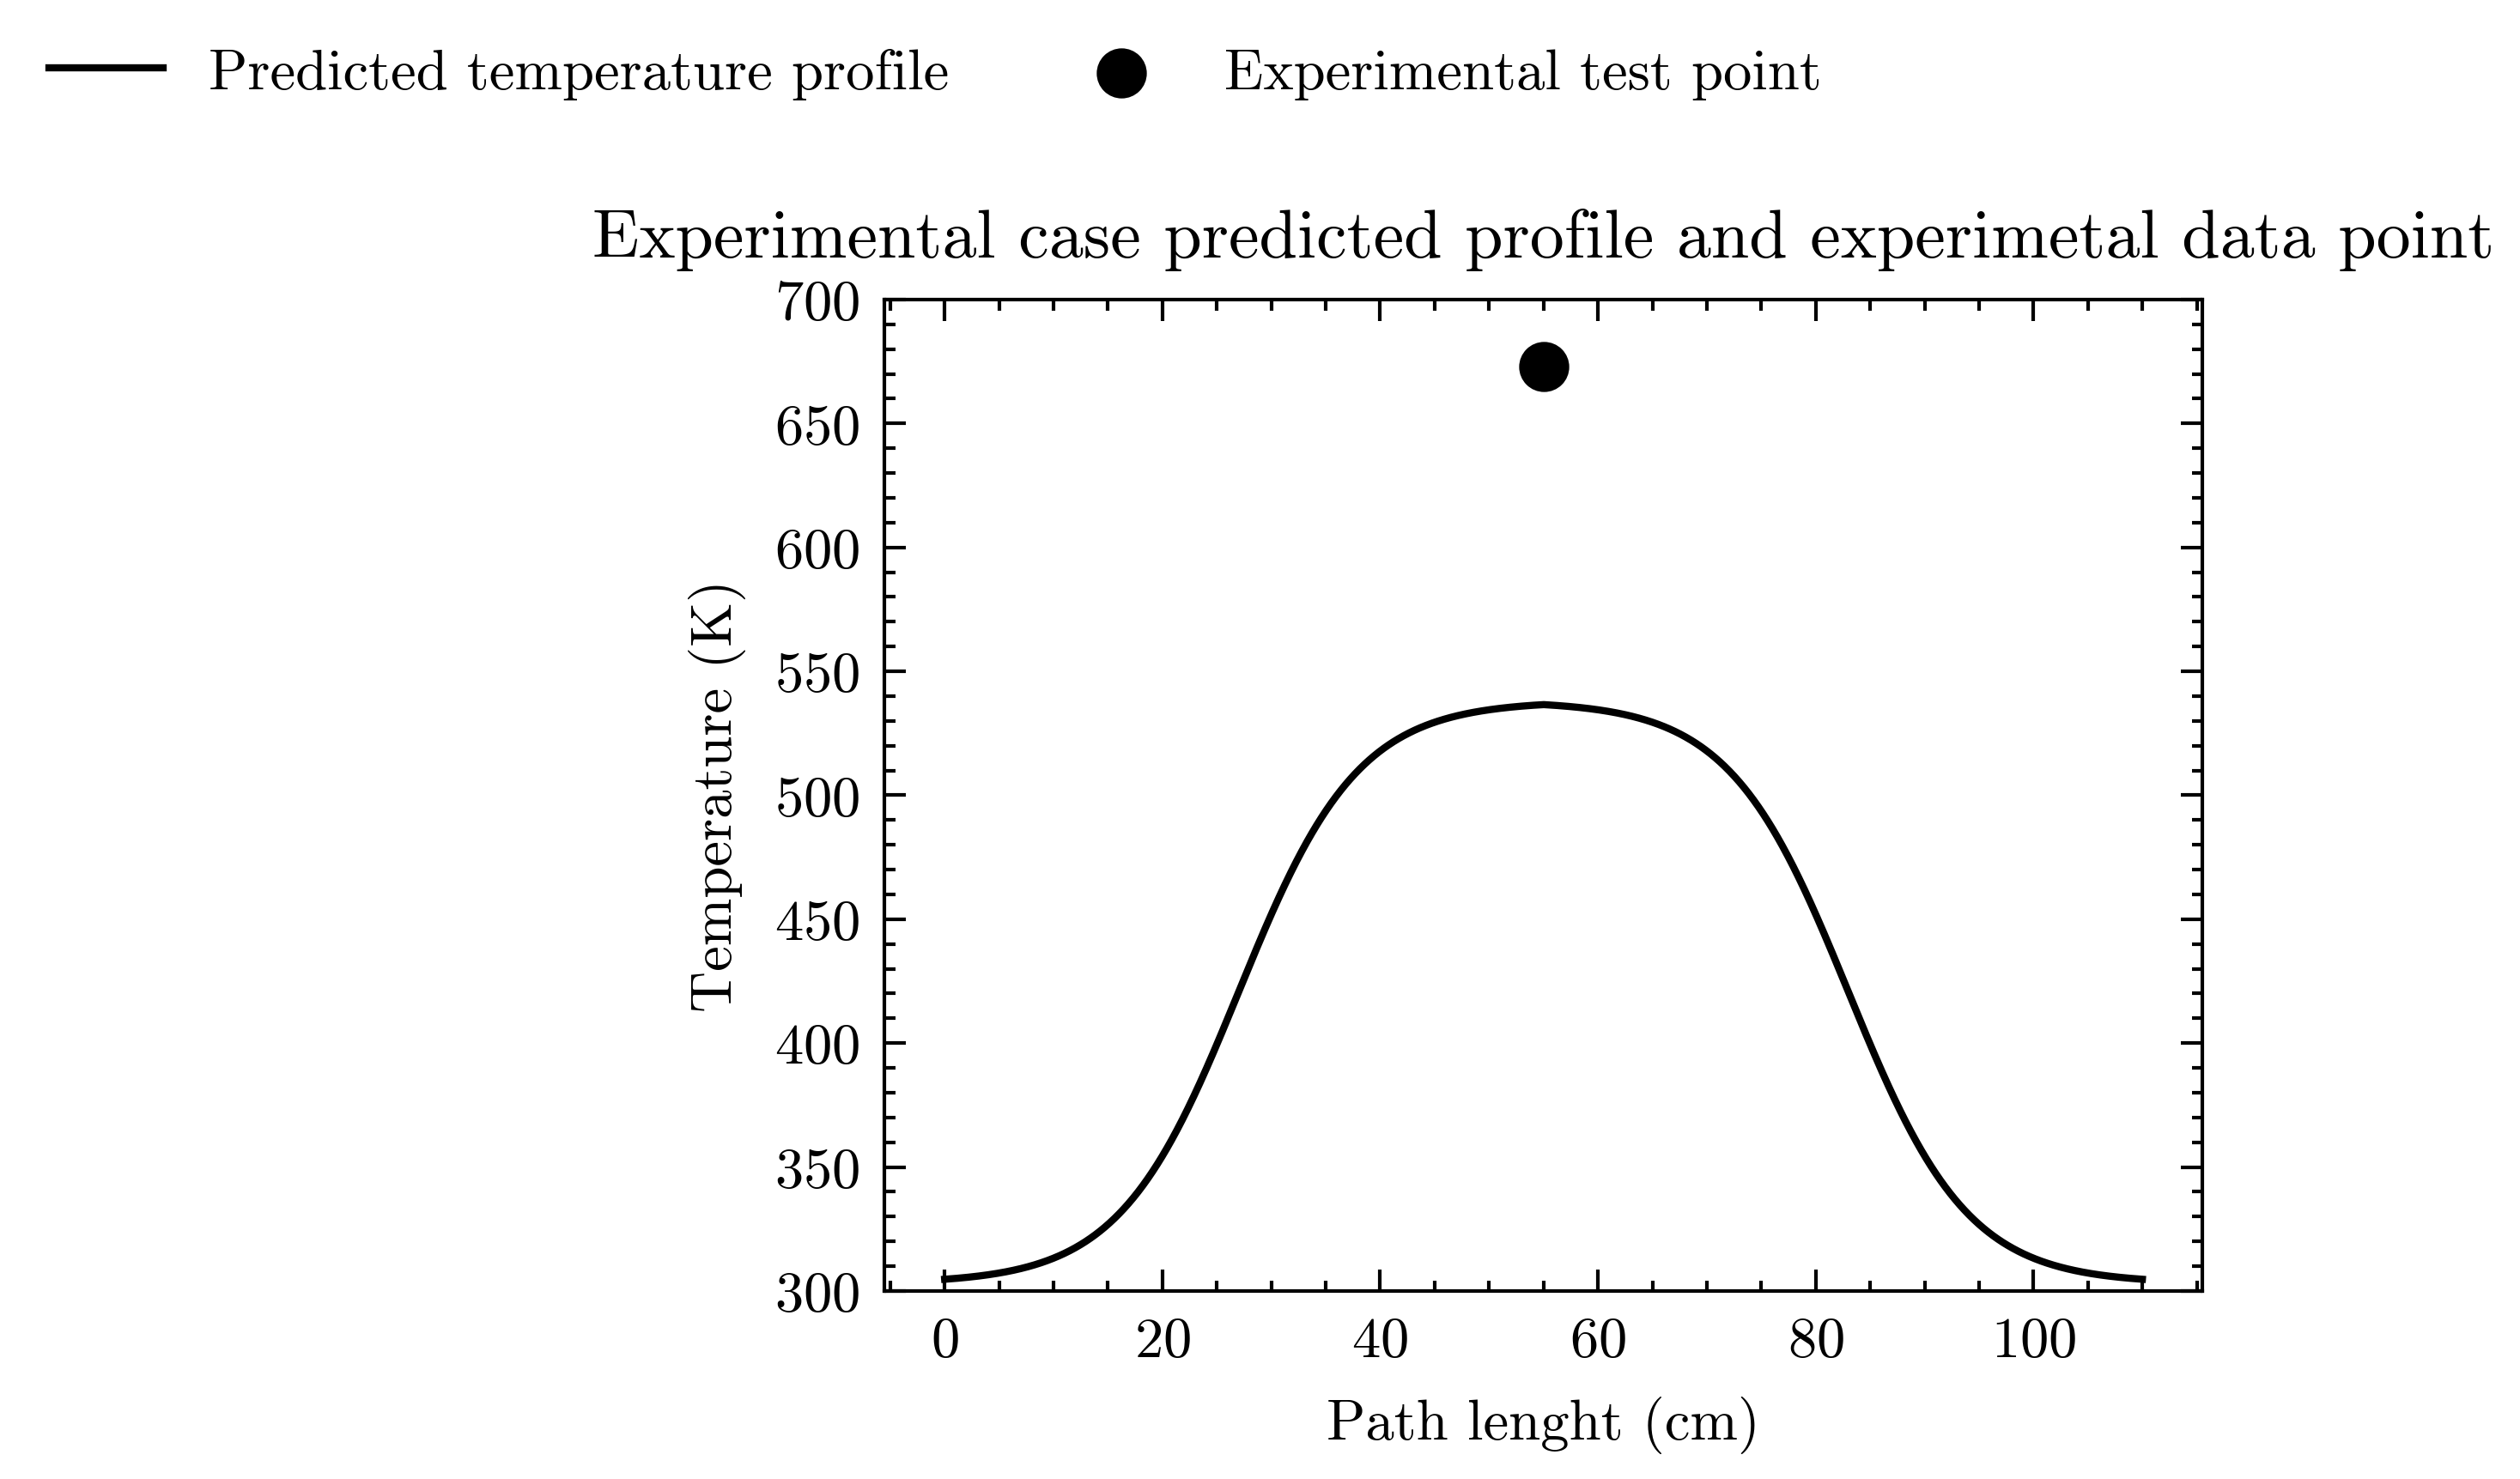

In [36]:
plt.plot(x1, k1, label="Predicted temperature profile")
plt.title('Experimental case predicted profile and experimetal data point')
plt.scatter(x1, a1, label="Experimental test point")
plt.ylim((300,700))
plt.ylabel("Temperature (K)")
plt.xlabel("Path lenght (cm)")
plt.legend(bbox_to_anchor=(0.75, 1.15),loc="lower right", ncol=10) 
plt.savefig('test71')

In [37]:
perft_temp = 400+273

In [38]:
print(f'The error in % in the predicted and real value: {abs((temp[0]-perft_temp)/perft_temp)*100} %')

The error in % in the predicted and real value: 20.059401587248775 %


In [40]:
r1 = np.zeros_like(k1)
y1 = np.zeros_like(k1)

r1[:1000] = np.flip(Pred_pro[10])
r1[1000:] = Pred_pro[10]

y1[:1000] = np.flip(True_pro[10])
y1[1000:] = True_pro[10]

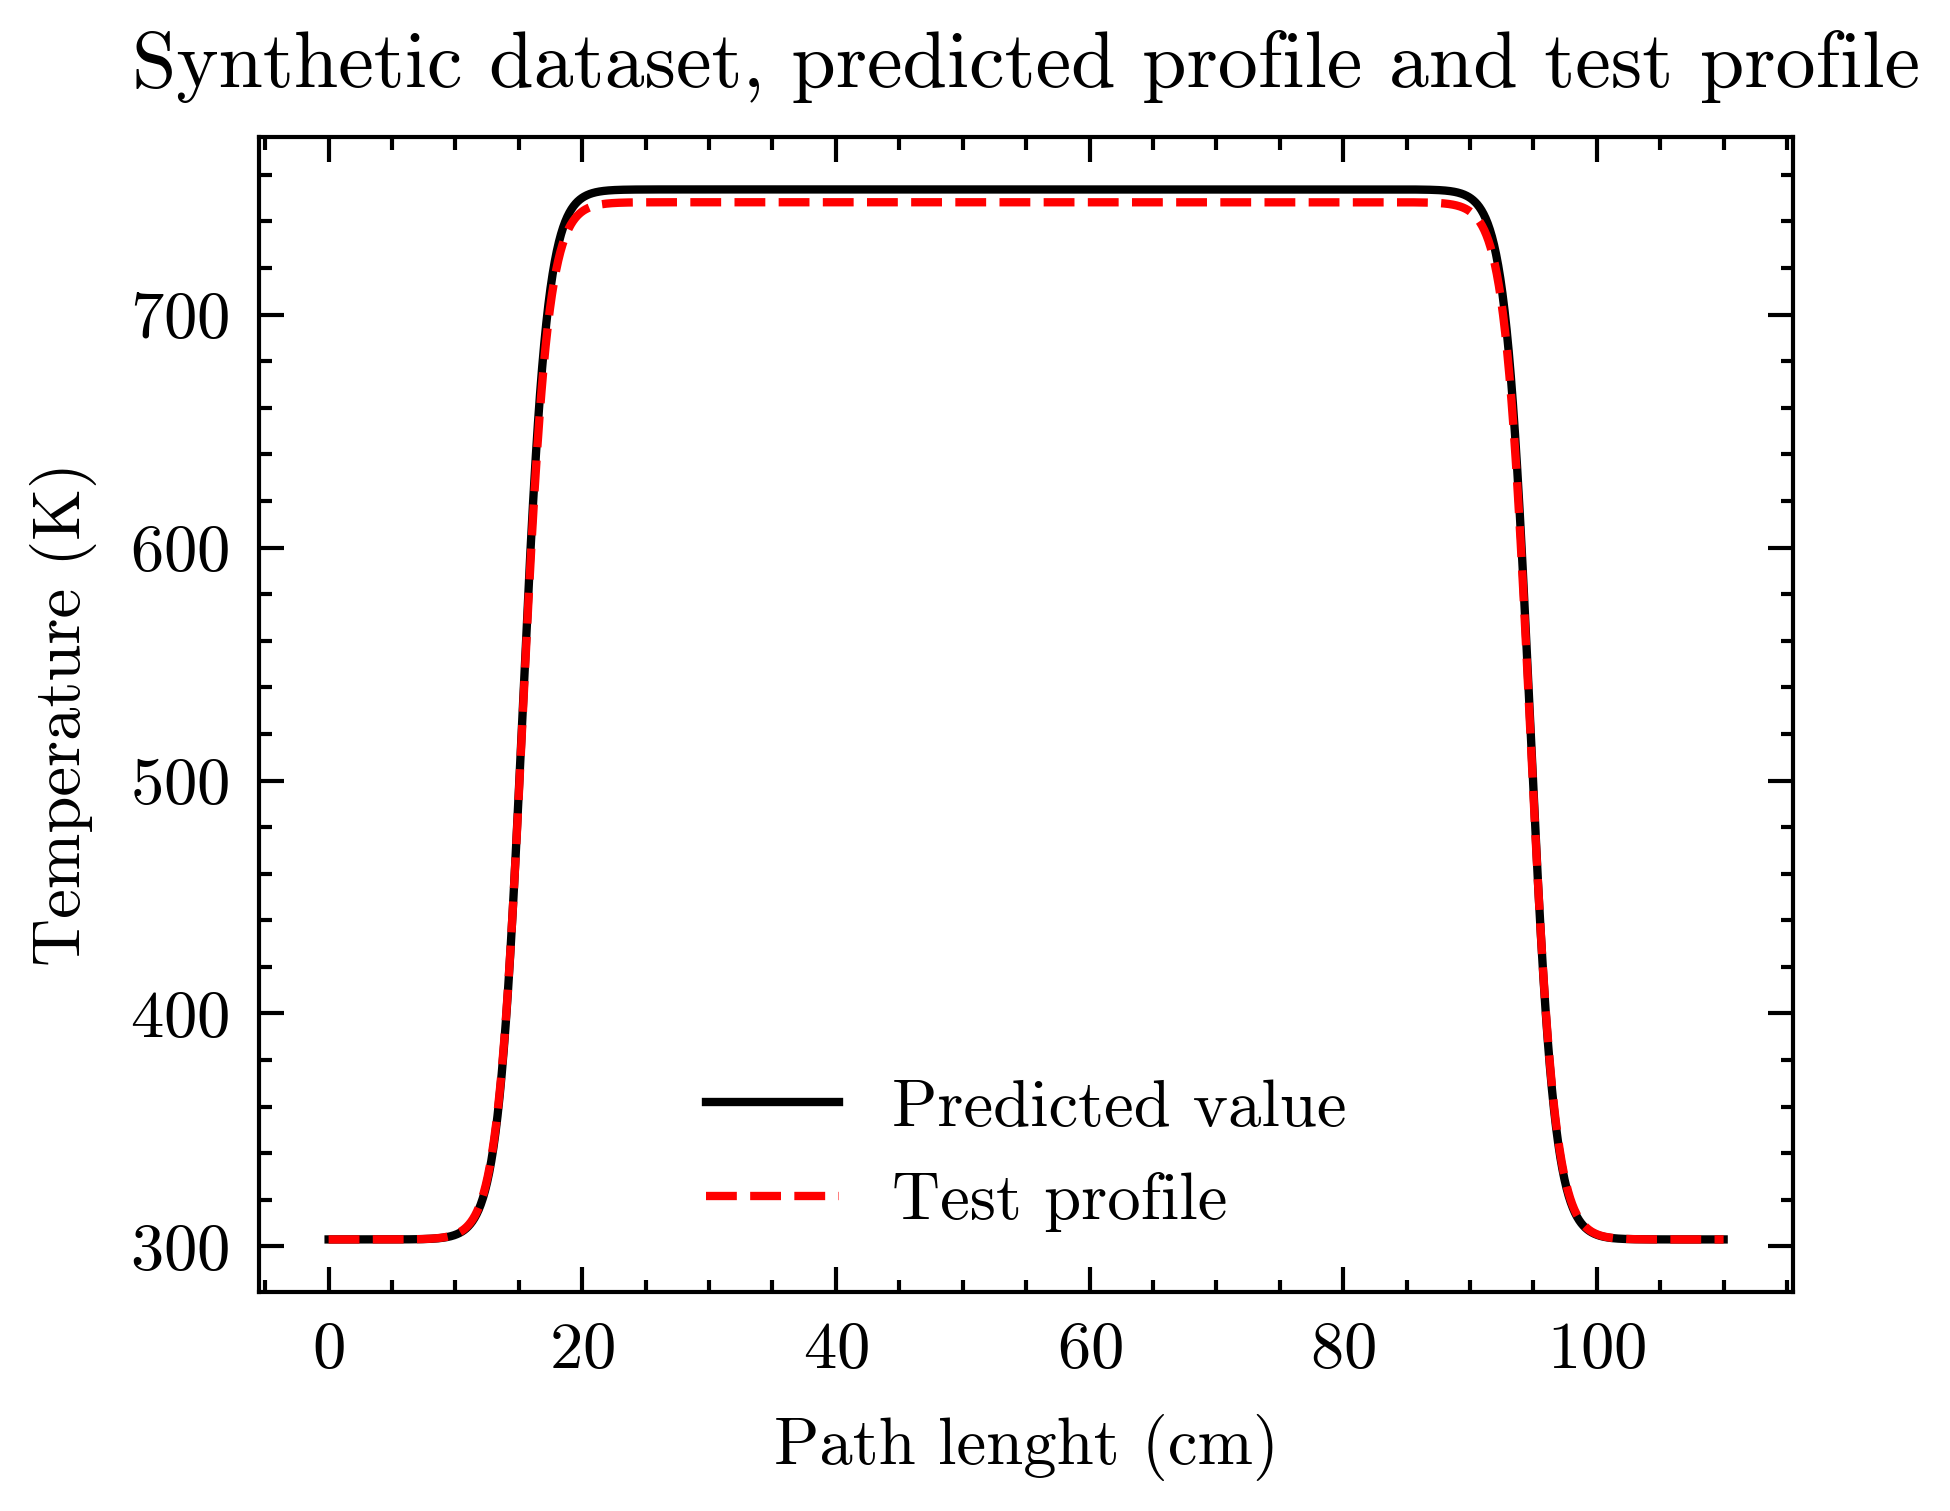

In [46]:
plt.plot(x1, r1, label = 'Predicted value')
plt.plot(x1, y1, label = 'Test profile')
plt.title('Synthetic dataset, predicted profile and test profile')
plt.ylabel("Temperature (K)")
plt.xlabel("Path lenght (cm)")
plt.legend()
plt.savefig('savegun')